# CASE 99

![alt text](https://drive.google.com/uc?id=1YBmniroREYVNRqPXSrPyGcAtXTn7-upL)

# Understanding and adaptating the Data Frame 
![alt text](https://drive.google.com/uc?id=1j5lBa7VOkyCw2w7VzU_MzN_4Qs-AZN2m)

### Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import date
from datetime import datetime
import folium
from folium import plugins

#### Connecting with DB

In [2]:
from sqlalchemy import create_engine

HOST = 'challenge-99.cdu4dk9fjcht.us-east-1.rds.amazonaws.com'
PORT = '5432'
DATABASE = 'challenge'
USER = 'candidate' 
PASSWORD = '99rules'  

POSTGRES = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=USER, password=PASSWORD, ipaddress=HOST, port=PORT, dbname=DATABASE))
conn = create_engine(POSTGRES)

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Collecting a Sample (Two Millions) from Table 'trips'

With this sample, our data frame is bettwen the period from 2014-03-01 00:00:00 to 2014-05-31 18:45:00.

In [3]:
df_trips = pd.read_sql_query('''SELECT * FROM public.trips ORDER BY order_id LIMIT 2000000;''', conn)
df_trips.head()

,order_id,pickup_datetime,dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,tip_amount,total_amount,passenger_id,driver_id
0,2,2014-04-20 11:10:38,2014-04-20 11:44:39,19.1,-73.781477,40.644832,2,-74.003763,40.741988,CSH,52.0,0.0,57.83,5234567822308275,5234567812351148
1,4,2014-04-20 14:18:29,2014-04-20 14:21:05,0.6,-73.972625,40.764185,1,-73.966510,40.770324,CSH,4.0,0.0,4.50,5234567821985772,5234567812348988
2,5,2014-04-20 12:51:53,2014-04-20 12:59:08,0.8,-73.992451,40.748906,1,-73.989148,40.757884,CSH,6.5,0.0,7.00,5234567812378178,5234567812381443
3,6,2014-04-20 10:51:19,2014-04-20 10:57:20,1.2,-73.954684,40.780665,1,-73.967041,40.765117,CSH,6.5,0.0,7.00,5234567819679714,5234567812346769
4,7,2014-04-20 11:51:58,2014-04-20 12:07:21,3.0,-73.999377,40.718518,1,-73.972818,40.755117,CSH,13.5,0.0,14.00,5234567812374532,5234567812349145


In [4]:
print(df_trips.pickup_datetime.min())
print(df_trips.pickup_datetime.max())

2014-03-01 00:00:00
2014-05-31 18:45:00


In [5]:
df_trips.shape

(2000000, 15)

In [6]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 15 columns):
order_id             int64
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
trip_distance        float64
pickup_longitude     float64
pickup_latitude      float64
rate_code            int64
dropoff_longitude    float64
dropoff_latitude     float64
payment_type         object
fare_amount          float64
tip_amount           float64
total_amount         float64
passenger_id         int64
driver_id            int64
dtypes: datetime64[ns](2), float64(8), int64(4), object(1)
memory usage: 228.9+ MB


In [7]:
df_trips.isnull().sum()

order_id             0
pickup_datetime      0
dropoff_datetime     0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
rate_code            0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
fare_amount          0
tip_amount           0
total_amount         0
passenger_id         0
driver_id            0
dtype: int64

### Analysing the relation bettwen table trips and orders
Here we can see that there is no difference bettwen the informations from each one. Because of this, I won't use table orders anymore.

In [8]:
df_orders = pd.read_sql_query('''SELECT * FROM public.orders where order_id=2;''', conn)
df_orders

,order_id,passenger_id,pickup_datetime,pickup_longitude,pickup_latitude,payment_type
0,2,5234567822308275,2014-04-20 11:10:38,-73.781477,40.644832,CSH


In [9]:
df_comp = pd.read_sql_query('''SELECT * FROM public.trips where order_id=2;''', conn)
df_comp.loc[[0], ['order_id','passenger_id','pickup_datetime','pickup_longitude','pickup_latitude','payment_type']]

,order_id,passenger_id,pickup_datetime,pickup_longitude,pickup_latitude,payment_type
0,2,5234567822308275,2014-04-20 11:10:38,-73.781477,40.644832,CSH


### Converting types of columns from table 'trips'

Converting column order_id, passenger_id and driver_id to String

In [10]:
order_id_str = df_trips.order_id.values.astype(str)
df_trips['order_id']=order_id_str

passenger_id_str = df_trips.passenger_id.values.astype(str)
df_trips['passenger_id']=passenger_id_str

driver_id_str = df_trips.driver_id.values.astype(str)
df_trips['driver_id']=driver_id_str

df_trips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 15 columns):
order_id             object
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
trip_distance        float64
pickup_longitude     float64
pickup_latitude      float64
rate_code            int64
dropoff_longitude    float64
dropoff_latitude     float64
payment_type         object
fare_amount          float64
tip_amount           float64
total_amount         float64
passenger_id         object
driver_id            object
dtypes: datetime64[ns](2), float64(8), int64(1), object(4)
memory usage: 228.9+ MB


### Describing Table 'trips'

In [11]:
df_trips.describe()

,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,2.913211e+00,-7.267473e+01,4.003388e+01,1.033936e+00,-7.261318e+01,4.000127e+01,1.245196e+01,1.536138e+00,1.506093e+01
std,3.419876e+00,9.724640e+00,5.356998e+00,4.753835e-01,9.940758e+00,5.476411e+00,1.023619e+01,2.307921e+00,1.243531e+01
min,0.000000e+00,-1.044112e+02,0.000000e+00,0.000000e+00,-1.190126e+02,0.000000e+00,2.500000e+00,0.000000e+00,2.500000e+00
25%,1.030000e+00,-7.399222e+01,4.073448e+01,1.000000e+00,-7.399142e+01,4.073316e+01,6.500000e+00,0.000000e+00,8.000000e+00
50%,1.800000e+00,-7.398198e+01,4.075241e+01,1.000000e+00,-7.397992e+01,4.075288e+01,9.500000e+00,1.000000e+00,1.130000e+01
75%,3.210000e+00,-7.396729e+01,4.076708e+01,1.000000e+00,-7.396259e+01,4.076834e+01,1.450000e+01,2.100000e+00,1.687000e+01
max,1.000000e+02,0.000000e+00,5.060686e+01,2.100000e+02,0.000000e+00,5.686966e+01,5.000000e+02,2.000000e+02,5.000000e+02


In [12]:
df_trips.describe(include=object)

,order_id,payment_type,passenger_id,driver_id
count,2000000,2000000,2000000,2000000
unique,2000000,5,1006006,50000
top,1572491,CRD,5234567812353334,5234567812346974
freq,1,1191799,43,170


### New collumn called pickup_dayweek and dropoff_day_week


In [0]:
day_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#Collecting day index from cloumn pickup date and creating new column called pickup_dayweek
pickup_dayindex = df_trips.pickup_datetime.dt.dayofweek
pickup_dayweek=[]
for i in range(len(pickup_dayindex)):
  pickup_dayweek.append(day_name[pickup_dayindex[i]])
  i+=1
df_trips['pickup_dayweek']=pickup_dayweek

#Collecting day index from cloumn dropoff date and creating new column called dropoff_dayweek
dropoff_dayindex = df_trips.dropoff_datetime.dt.dayofweek
dropoff_dayweek=[]
for i in range(len(dropoff_dayindex)):
  dropoff_dayweek.append(day_name[dropoff_dayindex[i]])
  i+=1
df_trips['dropoff_dayweek']=dropoff_dayweek

In [14]:
df_trips.tail()

,order_id,pickup_datetime,dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,tip_amount,total_amount,passenger_id,driver_id,pickup_dayweek,dropoff_dayweek
1999995,2619434,2014-03-17 13:18:00,2014-03-17 13:28:00,1.70,-73.983205,40.749835,1,-73.970632,40.761947,CSH,9.0,0.00,9.5,5234567822664287,5234567812345728,Monday,Monday
1999996,2619435,2014-03-17 13:00:00,2014-03-17 13:18:00,8.88,-73.967765,40.792225,1,-73.989332,40.742012,CRD,26.0,6.27,38.1,5234567812356276,5234567812394365,Monday,Monday
1999997,2619436,2014-03-22 09:06:00,2014-03-22 09:07:00,0.13,-73.994017,40.746555,1,-73.996007,40.747395,CSH,3.0,0.00,3.5,5234567820388592,5234567812351780,Saturday,Saturday
1999998,2619437,2014-03-22 09:00:00,2014-03-22 09:08:00,1.74,-73.952905,40.783197,1,-73.961270,40.763425,CRD,8.0,1.60,10.1,5234567812379212,5234567812376451,Saturday,Saturday
1999999,2619438,2014-03-18 07:43:00,2014-03-18 07:56:00,2.64,-73.977722,40.762917,1,-74.003635,40.740177,CSH,11.0,0.00,11.5,5234567812665760,5234567812351128,Tuesday,Tuesday


### Droping some rows where Rate Code is not one of the standard options

In [15]:
drop = df_trips[df_trips.rate_code.isin([210,  28,  65,   8])].index.values.astype(int)
df_trips1 = df_trips.drop(index=drop)
df_trips1.head()

,order_id,pickup_datetime,dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,tip_amount,total_amount,passenger_id,driver_id,pickup_dayweek,dropoff_dayweek
0,2,2014-04-20 11:10:38,2014-04-20 11:44:39,19.1,-73.781477,40.644832,2,-74.003763,40.741988,CSH,52.0,0.0,57.83,5234567822308275,5234567812351148,Sunday,Sunday
1,4,2014-04-20 14:18:29,2014-04-20 14:21:05,0.6,-73.972625,40.764185,1,-73.966510,40.770324,CSH,4.0,0.0,4.50,5234567821985772,5234567812348988,Sunday,Sunday
2,5,2014-04-20 12:51:53,2014-04-20 12:59:08,0.8,-73.992451,40.748906,1,-73.989148,40.757884,CSH,6.5,0.0,7.00,5234567812378178,5234567812381443,Sunday,Sunday
3,6,2014-04-20 10:51:19,2014-04-20 10:57:20,1.2,-73.954684,40.780665,1,-73.967041,40.765117,CSH,6.5,0.0,7.00,5234567819679714,5234567812346769,Sunday,Sunday
4,7,2014-04-20 11:51:58,2014-04-20 12:07:21,3.0,-73.999377,40.718518,1,-73.972818,40.755117,CSH,13.5,0.0,14.00,5234567812374532,5234567812349145,Sunday,Sunday


# COO

1. Quantity of trips per day of the week (Graph1)
2. Preferred hour to call a rider (Graph2)
3. Trip time per ride: Avarage of trip time (Graph4)
4. Preferred payment type (Graph5)

![alt text](https://drive.google.com/uc?id=1KPI6R7Jmc1wzmyYKYzILnLCJsv-G-EN4)

### 1. Quantity of trips per day of the week (Graph1)

This graph shows us that on the Weekends are the main days of the week where the costumers order further, with more than 300.000 rides. The main day is Saturday with approximately 361.000 rides.

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]), <a list of 9 Text xticklabel objects>)

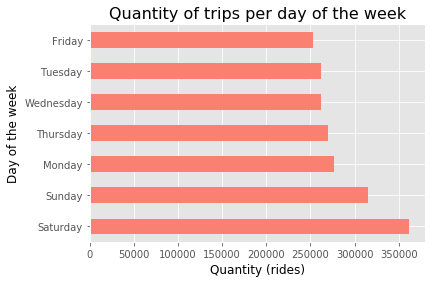

In [43]:
cont = df_trips['pickup_dayweek'].value_counts()

graph1 = cont.plot.barh(color='salmon')

graph1.axes.set_title('Quantity of trips per day of the week', fontsize=16,color="black",alpha=2)
graph1.set_xlabel("Quantity (rides)", size = 12,color="black")
graph1.set_ylabel("Day of the week", size = 12,color="black")
plt.xticks(rotation=0)

In [17]:
cont

Saturday     361067
Sunday       315249
Monday       276792
Thursday     269646
Wednesday    262087
Tuesday      261853
Friday       253306
Name: pickup_dayweek, dtype: int64

In [18]:
cont.describe()

count         7.000000
mean     285714.285714
std       38871.657317
min      253306.000000
25%      261970.000000
50%      269646.000000
75%      296020.500000
max      361067.000000
Name: pickup_dayweek, dtype: float64

### 2. Preferred hour to call a rider (Graph2)

This graph show us that durging the period bettwen 18h to 23h is the main hours where the costumers call a rides, with approximately than 115.000 calls.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

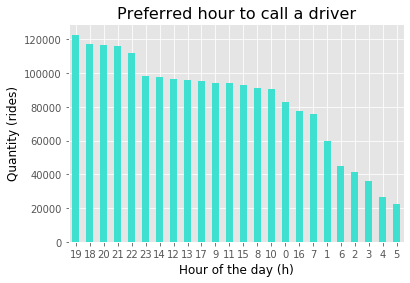

In [42]:
pickup_hour = df_trips.pickup_datetime.dt.hour.value_counts()

graph2 = pickup_hour.plot.bar(color='turquoise')

graph2.axes.set_title('Preferred hour to call a driver', fontsize=16,color="black",alpha=2)
graph2.set_xlabel("Hour of the day (h)", size = 12,color="black")
graph2.set_ylabel("Quantity (rides)", size = 12,color="black")
plt.xticks(rotation=0)

In [20]:
pickup_hour

19    122829
18    117553
20    116662
21    115995
22    112095
23     98195
14     97727
12     96410
13     95853
17     95627
9      94339
11     94009
15     93150
8      91384
10     90915
0      82624
16     77681
7      75833
1      59929
6      45112
2      41412
3      35799
4      26607
5      22260
Name: pickup_datetime, dtype: int64

### 3. Trip time per ride: Avarage of trip time (Graph3)

As we can note bellow,  the avarage trip time is 0h12m5s and the median is 0h10m19s.

In [21]:
time_trips = df_trips.dropoff_datetime - df_trips.pickup_datetime
time_trips.describe()

count                   2000000
mean     0 days 00:12:51.508649
std      0 days 00:37:03.875724
min          -25 days +23:53:21
25%             0 days 00:06:10
50%             0 days 00:10:19
75%             0 days 00:16:40
max             2 days 19:54:54
dtype: object

Text(0.5, 0, 'Trip time in hours (h)')

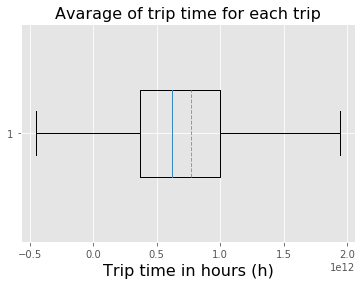

In [41]:
graph3 = plt.boxplot(time_trips, vert=False, showfliers=False, showbox=True, showmeans=True, meanline=True, widths=0.4, manage_ticks=True)
plt.title('Avarage of trip time for each trip', fontsize=16,color="black",alpha=2)
plt.xlabel('Trip time in hours (h)', fontsize=16,color="black",alpha=2)

### 4. Preferred payment type (Graph4)

As we can analyse, the preferred payment type is Card, which 59.59% of the customers use this way to pay, where a large difference between payment with Card, where 39.62% of the customers use.

<Figure size 2160x720 with 0 Axes>

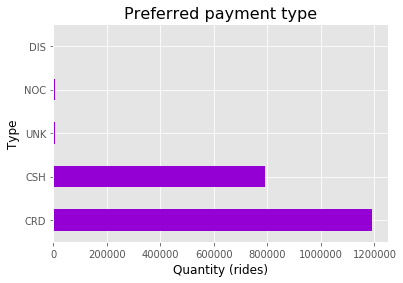

<Figure size 2160x720 with 0 Axes>

In [45]:
pay_type = df_trips.payment_type.value_counts()

graph4 = pay_type.plot.barh(color='darkviolet')
graph4.axes.set_title('Preferred payment type', fontsize=16,color="black",alpha=2)
graph4.set_xlabel("Quantity (rides)", size = 12,color="black")
graph4.set_ylabel("Type", size = 12,color="black")
plt.xticks(rotation=0)

In [24]:
pay_type

CRD    1191799
CSH     792338
UNK       8035
NOC       5987
DIS       1841
Name: payment_type, dtype: int64

# CFO

1. Income per hour: Ride fare in relation with hour of the day (Graph5)
2. Income per driver: Analysing how much is the income per Driver
3. Correlation of Table 'trips' to analyse the fare_amount
4. Rate Code most used (Graph6)

![alt text](https://drive.google.com/uc?id=1Ds7mt1B3HIMzld4wzOxVz2UMAUsW0Xpy)

### 1. Income per hour: Ride fare in relation with hour of the day (Graph 5)

This graph show us that the ride fare avarage from each hour of the day don't vary much when We compare each one, however at 5h the ride fare is more than US16, almost US4 more than the ride fare average.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

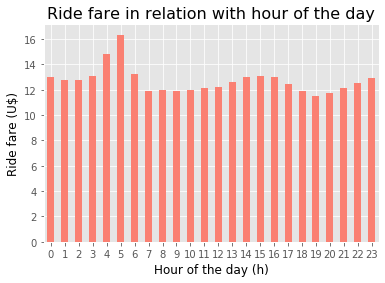

In [39]:
fare_hour = df_trips['fare_amount'].groupby(df_trips.pickup_datetime.dt.hour).mean()

graph5 = fare_hour.plot.bar(color='salmon')

graph5.axes.set_title('Ride fare in relation with hour of the day', fontsize=16,color="black",alpha=2)
graph5.set_xlabel("Hour of the day (h)", size = 12,color="black")
graph5.set_ylabel("Ride fare (U$)", size = 12,color="black")
plt.xticks(rotation=0)


In [26]:
fare_hour

pickup_datetime
0     13.039635
1     12.758363
2     12.789036
3     13.114316
4     14.839495
5     16.345214
6     13.206901
7     11.934044
8     11.964314
9     11.925023
10    11.979143
11    12.158862
12    12.246290
13    12.580942
14    13.026493
15    13.071306
16    13.020563
17    12.479820
18    11.936501
19    11.501389
20    11.760449
21    12.166059
22    12.518927
23    12.917542
Name: fare_amount, dtype: float64

### 2. Analysing how much is the income per Driver

Describing this relation we could find that the avarage income per driver is US15.05 ± 2.61, with a median US14.81 each ride. This analysis also showed us that the avarage tip per driver is US1.54 ± 0.18.

In [27]:
amount_driver = df_trips['total_amount'].groupby(df_trips.driver_id).mean()
amount_driver.describe()

count    50000.000000
mean        15.053885
std          2.612434
min          7.306667
25%         13.356016
50%         14.817633
75%         16.397500
max         43.578667
Name: total_amount, dtype: float64

In [28]:
tip_driver = df_trips['tip_amount'].groupby(df_trips.driver_id).mean()
tip_driver.describe()

count    50000.000000
mean         1.535865
std          0.482703
min          0.181818
25%          1.233333
50%          1.489375
75%          1.770537
max         11.140000
Name: tip_amount, dtype: float64

### 3. Correlation of Table 'trips' to analyse the fare_amount

Here we can observe that fare amount have a strong correlation with trip_distance (0.905326) and a moderate correlation with rate_code (0.304522). T
Therefore, the longer the trip, the higher the fare will be.

In [29]:
corr1 = df_trips.corr()
corr1.style.background_gradient(cmap='coolwarm')

,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
trip_distance,1,-0.00575072,0.00610077,0.209222,-0.0133125,0.0136293,0.905326,0.523821,0.901492
pickup_longitude,-0.00575072,1,-0.999935,0.0315753,0.925954,-0.925906,0.0140878,0.0102617,0.0132215
pickup_latitude,0.00610077,-0.999935,1,-0.0315632,-0.925935,0.92591,-0.0138028,-0.0101313,-0.0128879
rate_code,0.209222,0.0315753,-0.0315632,1,0.0404181,-0.0405319,0.304522,0.16801,0.302127
dropoff_longitude,-0.0133125,0.925954,-0.925935,0.0404181,1,-0.999891,0.0179401,0.010089,0.016433
dropoff_latitude,0.0136293,-0.925906,0.92591,-0.0405319,-0.999891,1,-0.0178246,-0.010203,-0.0163344
fare_amount,0.905326,0.0140878,-0.0138028,0.304522,0.0179401,-0.0178246,1,0.554814,0.982566
tip_amount,0.523821,0.0102617,-0.0101313,0.16801,0.010089,-0.010203,0.554814,1,0.683225
total_amount,0.901492,0.0132215,-0.0128879,0.302127,0.016433,-0.0163344,0.982566,0.683225,1


### 4. Rate Code most used (Graph6)


Through of the analysis below, the most used Rate Code is 1 (Standard Rate), with 97.74% of the trips.

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 <a list of 10 Text xticklabel objects>)

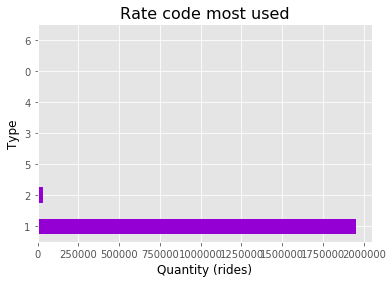

In [30]:
rate = df_trips1['rate_code'].value_counts()

graph6 = rate.plot.barh(color='darkviolet')
graph6.axes.set_title('Rate code most used', fontsize=16,color="black",alpha=2)
graph6.set_xlabel("Quantity (rides)", size = 12,color="black")
graph6.set_ylabel("Type", size = 12,color="black")
plt.xticks(rotation=0)

In [31]:
rate

1    1954785
2      35652
5       5502
3       3294
4        657
0         68
6         32
Name: rate_code, dtype: int64

# CEO



  The KPIs to be analysed by CEO must be all KPIs from COO and CFO, as also this section destinated to him, where the CEO can see the Heat Map. Through the Heat Map he can view the main places where is the pickup and dropoff of costumers. 

Thus he can use this visual informations and make decision about operations and expasion.

![alt text](https://drive.google.com/uc?id=1aC-48FoeRmna6y9JFDiuLJpzCp-DNkuY)



### Pickup Costumer Heat Map 

In [0]:
df_trips2 = df_trips.sample(frac=0.01)

In [0]:
coord_pickup = []
for lat,lng in zip(df_trips2.pickup_latitude.values[:], df_trips2.pickup_longitude.values[:]):
  coord_pickup.append([lat,lng])

In [0]:
map1 = folium.Map(location=[40.6643, -73.9385], zoom_start=11, tiles='OpenStreetMap')

In [35]:
map1.add_child(plugins.HeatMap(coord_pickup))
map1

### Dropoff Costumers Heat Map

In [0]:
coord_dropoff = []
for lat,lng in zip(df_trips2.dropoff_latitude.values[:], df_trips2.dropoff_longitude.values[:]):
  coord_dropoff.append([lat,lng])

In [0]:
map2 = folium.Map(location=[40.6643, -73.9385], zoom_start=11, tiles='OpenStreetMap')

In [38]:
map2.add_child(plugins.HeatMap(coord_dropoff))
map2